<a href="https://colab.research.google.com/github/g-roger/natural-language-process/blob/main/Aula_3_6_IA_PLN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Processamento de Linguagem Natural**

---


## Stemmer (Stemização)

---

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
exemplos = ["connection","connections","connective","connecting","connected"]
print(exemplos)

for word in exemplos:
  print(ps.stem(word))

connect
connect
connect
connect
connect


In [ ]:
# Outro exemplo
ps = PorterStemmer()
exemplos = ["go","going","goes","gone","went"]
print(exemplos)

for word in exemplos:
  print(ps.stem(word))

['go', 'going', 'goes', 'gone', 'went']
go
go
goe
gone
went


In [ ]:
# Stemização
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk 
nltk.download('rslp')

doc = ["pedra","pedreira","pedreiro"]
print(doc)

ps = PorterStemmer()
rslp = RSLPStemmer()

for word in doc:
    print(ps.stem(word), ' - ', rslp.stem(word))

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
['pedra', 'pedreira', 'pedreiro']
pedra  -  pedr
pedreira  -  pedr
pedreiro  -  pedr


## Aplicar Stemmer em uma frase

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'text': [
      'Sobre MBA? Eu gostei muito do MBA da FIAP',
      'O MBA da FIAP pode melhorar, não gostei muito'
    ],
    'class': [
        'positivo',
        'negativo'
    ]})

df.head()

,text,class
0,Sobre MBA? Eu gostei muito do MBA da FIAP,positivo
1,"O MBA da FIAP pode melhorar, não gostei muito",negativo


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['tokens'] = df.text.apply(word_tokenize)
df['tokens']

,text,class,tokens
0,Sobre MBA? Eu gostei muito do MBA da FIAP,positivo,"[Sobre, MBA, ?, Eu, gostei, muito, do, MBA, da..."
1,"O MBA da FIAP pode melhorar, não gostei muito",negativo,"[O, MBA, da, FIAP, pode, melhorar, ,, não, gos..."


In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk
nltk.download('rslp')

tokens = df.tokens[0]
tokens = tokens + df.tokens[1]

ps = PorterStemmer()
rslp = RSLPStemmer()

for tok in tokens:
  #print('Original: %s \t\t  PorterStemmer: %s \t\t RSLPStemmer: %s' % (tok, ps.stem(tok), rslp.stem(tok)))
  print(f'Original: {tok:{11}} PorterStemmer: {ps.stem(tok):{10}} RSLPStemmer: {rslp.stem(tok):{10}}')


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
Original: Sobre       PorterStemmer: sobr       RSLPStemmer: sobr      
Original: MBA         PorterStemmer: mba        RSLPStemmer: mba       
Original: ?           PorterStemmer: ?          RSLPStemmer: ?         
Original: Eu          PorterStemmer: Eu         RSLPStemmer: eu        
Original: gostei      PorterStemmer: gostei     RSLPStemmer: gost      
Original: muito       PorterStemmer: muito      RSLPStemmer: muit      
Original: do          PorterStemmer: do         RSLPStemmer: do        
Original: MBA         PorterStemmer: mba        RSLPStemmer: mba       
Original: da          PorterStemmer: da         RSLPStemmer: da        
Original: FIAP        PorterStemmer: fiap       RSLPStemmer: fiap      
Original: O           PorterStemmer: O          RSLPStemmer: o         
Original: MBA         PorterStemmer: mba        RSLPStemmer: mba       
Original: da          Porte

In [ ]:
# O Porter foi criado para o inglês e o RSLP para o português

NLTK = Natural Language Tool Kit

RSLP = Removedor de Sulfixos da Língua Portuguesa


## Quantos unigramas existem após aplicar Stemmer?

In [ ]:
','.join(['Anderson', 'Dourado'])

'Anderson,Dourado'

In [ ]:
from nltk.stem.rslp import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer

rslp = RSLPStemmer()

def stem_pandas(line):
  return ' '.join([rslp.stem(token) for token in line])

df['stemmer'] = df.tokens.apply(stem_pandas)

df.stemmer.head()

0      sobr mba ? eu gost muit do mba da fiap
1    o mba da fiap pod melhor , não gost muit
Name: stemmer, dtype: object

In [ ]:
import nltk

vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.stemmer)

text_vect = vect.transform(df.stemmer)

print('UNIGRAMAS', text_vect.shape[1])

#print(text_vect.shape[0])
#print(text_vect.shape[1])

UNIGRAMAS 11


Unigramas sem aplicar o stemmer

In [ ]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')
vect = CountVectorizer(ngram_range=(1,1), stop_words=stopwords)
vect.fit(df.text)

text_vect = vect.transform(df.text)

print('UNIGRAMAS sem STOPWORDS', text_vect.shape[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
UNIGRAMAS sem STOPWORDS 6


In [ ]:
# Não diferença pois o texto não tem muitas variações de palavras que possam ser reduzidas

Outra função de stematização do NLTK

In [ ]:
from nltk.stem import SnowballStemmer

print(" ".join(SnowballStemmer.languages)) # See which languages are supported

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [ ]:
stemmer = SnowballStemmer("portuguese") # Escolha a linguagem

palavras = ['pedra','pedreira','criar']

for p in palavras:
  print(stemmer.stem(p)) # Stem a palavra

pedr
pedreir
cri


## Lemmatizer (Lematização)

---

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

exemplos = ["connection","connections","connective","connecting","connected"]
wnl = WordNetLemmatizer()

for word in exemplos:
    print(wnl.lemmatize(word,"v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
connection
connections
connective
connect
connect


In [ ]:
exemplos = ["go","going","goes","gone","went"]
wnl = WordNetLemmatizer()

for word in exemplos:
  print(wnl.lemmatize(word,"v"))

go
go
go
go
go


Vamos ver lematização em palavras do português mais para frente, pois o NLTK não possui lematização em português.


## Contagem de Termos - UNIGRAMA

---

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'text': [
      'Sobre MBA ? Eu gostei muito do MBA da FIAP',
      'O MBA da FIAP pode melhorar, não gostei muito'
    ],
    'class': [
        'positivo',
        'negativo'
    ]})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1))
#vect = CountVectorizer(ngram_range=(1,3))
vect.fit(df.text)
count_vect = vect.transform(df.text)

print(pd.DataFrame(count_vect.A, columns=vect.get_feature_names()).T.to_string())
#print(pd.DataFrame(count_vect.A, columns=vect.get_feature_names()).to_string())

array([[1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]])

## TF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect.fit(df.text)
tf_vect = vect.transform(df.text)

print(pd.DataFrame(tf_vect.A, columns=vect.get_feature_names()).T.to_string())

                 0      1
da        0.111111  0.125
do        0.111111  0.000
eu        0.111111  0.000
fiap      0.111111  0.125
gostei    0.111111  0.125
mba       0.222222  0.125
melhorar  0.000000  0.125
muito     0.111111  0.125
não       0.000000  0.125
pode      0.000000  0.125
sobre     0.111111  0.000


In [ ]:
#vect.get_stop_words()
#vect.get_params(deep=True)

## TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer() 
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names()).T.to_string())

                 0         1
da        0.267970  0.302531
do        0.376623  0.000000
eu        0.376623  0.000000
fiap      0.267970  0.302531
gostei    0.267970  0.302531
mba       0.535941  0.302531
melhorar  0.000000  0.425196
muito     0.267970  0.302531
não       0.000000  0.425196
pode      0.000000  0.425196
sobre     0.376623  0.000000


Existe uma diferenca no cálculo original do TF-IDF apresentados pelos livros em relação ao padrão urilizado pelo Scikit Learn. A ideia dessa diferença é evitar divisões por zero.

Formúla original:

    TF-IDFw1 = TFw1 * IDFw1
    IDFw1 = loge(D/Dw1)
    D = total de documentos | Dw1 = Quantidade de documentos em que o termo aparece

----
Formúla do sklearn:
Muda o cálculo do IDFw1

    IDFw! = loge(1+D/1+Dw1)+1

Com o paâmetro smooth_idf=False

    IDFw! = loge(D/Dw1)+1



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(smooth_idf=False)
#vect = TfidfVectorizer(smooth_idf=False, max_df=1, min_df=1)
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names()).T.to_string())

                 0         1
da        0.245439  0.271161
do        0.415564  0.000000
eu        0.415564  0.000000
fiap      0.245439  0.271161
gostei    0.245439  0.271161
mba       0.490877  0.271161
melhorar  0.000000  0.459115
muito     0.245439  0.271161
não       0.000000  0.459115
pode      0.000000  0.459115
sobre     0.415564  0.000000


In [ ]:
'''
tfidf_vect.data
tfidf_vect.A
vect.get_feature_names()
'''

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer


https://scikit-learn.org/stable/modules/feature_extraction.html

O cáculo do TF-IDF das classes TfidfTransformer e TfidfVectorizer do scikit-learn diferem ligeiramente da notação padrão de livros didáticos que define o IDF.


#**Modelo com n-grama**
---

In [ ]:
df

,text,class
0,Sobre MBA ? Eu gostei muito do MBA da FIAP,positivo
1,"O MBA da FIAP pode melhorar, não gostei muito",negativo


In [ ]:
df['class']

0    positivo
1    negativo
Name: class, dtype: object

###Transformando os textos/dados em uma "linguagem" para o modelo

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer()
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names()).to_string())

         da        do        eu      fiap    gostei       mba  melhorar     muito       não      pode     sobre
0  0.267970  0.376623  0.376623  0.267970  0.267970  0.535941  0.000000  0.267970  0.000000  0.000000  0.376623
1  0.302531  0.000000  0.000000  0.302531  0.302531  0.302531  0.425196  0.302531  0.425196  0.425196  0.000000


###Treinando um modelo de Árvore de Decisão


In [ ]:
# treinando um modelo de árevore de decisão
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(tfidf_vect, df['class'])

print('D Tree: ', tree.score(tfidf_vect, df['class'])) # retorna a acurracy - precisão do modelo

D Tree:  1.0


In [ ]:
#tree.score(tfidf_vect, df['class'])

###Aplicando o conhecimento do modelo em um novo documento

In [ ]:
vetor = vect.transform(['o curso pode melhorar'])
print(pd.DataFrame(vetor.A, columns=vect.get_feature_names()).to_string())

print('D Tree: ', tree.predict(vetor))

    da   do   eu  fiap  gostei  mba  melhorar  muito  não      pode  sobre
0  0.0  0.0  0.0   0.0     0.0  0.0  0.707107    0.0  0.0  0.707107    0.0
D Tree:  ['positivo']


# **Montando nossa amostra**

---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# mostrar a estrutura de pastas do google drive montado
!ls -la
!ls -la gdrive/MyDrive/FIAP/NLP/dados

Mounted at /content/gdrive
total 20
drwxr-xr-x 1 root root 4096 Nov  8 22:30 .
drwxr-xr-x 1 root root 4096 Nov  8 22:20 ..
drwxr-xr-x 4 root root 4096 Nov  1 13:34 .config
drwx------ 5 root root 4096 Nov  8 22:30 gdrive
drwxr-xr-x 1 root root 4096 Nov  1 13:35 sample_data
total 1233808
-rw------- 1 root root 929305948 Mar 11  2020 cbow_s300.zip
-rw------- 1 root root 127066935 Mar 29  2020 imdb-reviews-pt-br.csv
-rw------- 1 root root   3776170 Mar 29  2020 produtos.csv
-rw------- 1 root root 203269084 Jun 11  2020 pt.zip


Selecioando dados aleatórios direto do arquivo

In [ ]:
import pandas as pd

df = pd.read_csv(
    "gdrive/MyDrive/FIAP/NLP/dados/produtos.csv",
    delimiter=";",
    encoding='utf-8'
  ).sample(frac=0.5, random_state=42)

df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']
df.describe()

#df.sample(frac=0.5, random_state=42)

,nome,descricao,categoria,texto
count,2916,2916,2916,2916
unique,2584,2460,4,2646
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Bonecos Brinquedo Vingadores 30 Cm Com Luz E...
freq,20,39,838,20


In [ ]:
'''
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  ).sample(frac=0.5, random_state=42)
'''

In [ ]:
'''
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  ).sample(1000)
'''

## Divisão do dataframe em amostras treino e teste

In [ ]:
import pandas as pd

df = pd.read_csv("gdrive/MyDrive/FIAP/NLP/dados/produtos.csv", delimiter=";", encoding='utf-8')

df.dropna(inplace=True)

df["texto"] = df['nome'] + " " + df['descricao']

df.describe()

,nome,descricao,categoria,texto
count,2916,2916,2916,2916
unique,2584,2460,4,2646
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Bonecos Brinquedo Vingadores 30 Cm Com Luz E...
freq,20,39,838,20


In [ ]:
from sklearn.model_selection import train_test_split

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df, 
      test_size = 0.3, 
      random_state = 42
  )

Analisando a distribuição das amostras em relação ao total

In [ ]:
print("Original")
print(df.categoria.value_counts())
print("\nTreino")
print(df_train.categoria.value_counts())
print("\nTeste")
print(df_test.categoria.value_counts())

Original
livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

Treino
livro        577
maquiagem    558
brinquedo    478
game         428
Name: categoria, dtype: int64

Teste
livro        261
maquiagem    230
game         194
brinquedo    190
Name: categoria, dtype: int64


In [ ]:
print("Original")
print(df.categoria.value_counts()/df.shape[0])
print("\nTreino")
print(df_train.categoria.value_counts()/df_train.shape[0])
print("\nTeste")
print(df_test.categoria.value_counts()/df_test.shape[0])

Original
livro        0.287380
maquiagem    0.270233
brinquedo    0.229081
game         0.213306
Name: categoria, dtype: float64

Treino
livro        0.282705
maquiagem    0.273395
brinquedo    0.234199
game         0.209701
Name: categoria, dtype: float64

Teste
livro        0.298286
maquiagem    0.262857
game         0.221714
brinquedo    0.217143
Name: categoria, dtype: float64


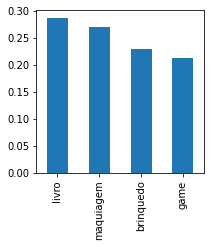

In [ ]:
(df.categoria.value_counts()/df.shape[0]).plot(kind='bar', figsize=(3,3))

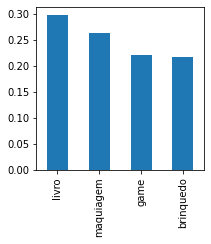

In [ ]:
(df_test.categoria.value_counts()/df_test.shape[0]).plot(kind='bar', figsize=(3,3))

## Outra forma: seria separando cada objeto já tratado

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(df.texto)
text_vect = vect.transform(df.texto)

# divisão da amostra entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
      text_vect, 
      df["categoria"], 
      test_size = 0.3, 
      random_state = 42
  )

Analisando a distribuição das amostras em relação ao total

In [ ]:
print("Original")
print(df.categoria.value_counts()/df.shape[0])
print("\nTreino")
print(y_train.value_counts()/y_train.shape[0])
print("\nTeste")
print(y_test.value_counts()/y_test.shape[0])

Original
livro        0.287380
maquiagem    0.270233
brinquedo    0.229081
game         0.213306
Name: categoria, dtype: float64

Treino
livro        0.282705
maquiagem    0.273395
brinquedo    0.234199
game         0.209701
Name: categoria, dtype: float64

Teste
livro        0.298286
maquiagem    0.262857
game         0.221714
brinquedo    0.217143
Name: categoria, dtype: float64


Trestando o modelo de uma forma simplificada

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# treinamento do modelo ávore de decisão
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# escoragem da classificação na amostra de teste
y_prediction = tree.predict(X_test)

# mensuração do resultado pela acurácia
accuracy = accuracy_score(y_prediction, y_test)
print(accuracy)

print(" ")
print(text_vect.shape)

0.9588571428571429
 
(2916, 35466)


Testando o modelo da forma mais acertiva

In [ ]:
print(df_train.head(5))
print(df_test.head(5))

                                                   nome  ...                                              texto
1799   Refil De Dardos  Nerf Zombie Strike 1 Pacote ...  ...   Refil De Dardos  Nerf Zombie Strike 1 Pacote ...
1339   Bandana Naruto Shippuden Konoha Cosplay Ninja...  ...   Bandana Naruto Shippuden Konoha Cosplay Ninja...
92                  O Diário De Anne Frank - Capa Dura   ...   O Diário De Anne Frank - Capa Dura  Produto N...
3228    Jogos Steam Aleatório - Pc Game - Key Original   ...   Jogos Steam Aleatório - Pc Game - Key Origina...
940    Livro Trilogia O Senhor Dos Anéis - 3 Livros ...  ...   Livro Trilogia O Senhor Dos Anéis - 3 Livros ...

[5 rows x 4 columns]
                                                   nome  ...                                              texto
2700   Estojo Duo Iluminador E Bronzer Belle Angel M...  ...   Estojo Duo Iluminador E Bronzer Belle Angel M...
1297   Patrulha Canina Carrinhos De Fricção 6 Person...  ...   Patrulha Canina Car

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df, 
      test_size = 0.3, 
      random_state = 42
  )

# pre-processamento (normalização, stemmer, etc)

# vetorização da base de treino
vect = CountVectorizer()
vect.fit(df_train.texto)
text_vect_train = vect.transform(df_train.texto)

# treinamento do modelo árvore de decisão
tree = DecisionTreeClassifier(random_state=42)
tree.fit(text_vect_train, df_train.categoria)

# escoragem da classificação na amostra de teste
text_vect_test = vect.transform(df_test.texto)
y_prediction = tree.predict(text_vect_test)

# mensuração do resultado pela acurácia
accuracy = accuracy_score(y_prediction, df_test.categoria)
print(accuracy)

print(" ")
print(text_vect.shape)
print(text_vect_train.shape)
print(text_vect_test.shape)

0.9565714285714285
 
(2916, 35466)
(2041, 29957)
(875, 29957)


In [ ]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Salvando o modelo treinado e o vetor de transformação.

In [ ]:
import pickle

pickle.dump(tree, open('minhaarvore.pkl', 'wb'))
pickle.dump(vect, open('vetorizador.pkl', 'wb'))

In [ ]:
!ls -la

total 1756
drwxr-xr-x 1 root root    4096 Nov 10 12:18 .
drwxr-xr-x 1 root root    4096 Nov 10 12:14 ..
drwxr-xr-x 4 root root    4096 Nov  1 13:34 .config
-rw-r--r-- 1 root root   14838 Nov 10 12:18 minhaarvore.pkl
drwxr-xr-x 1 root root    4096 Nov  1 13:35 sample_data
-rw-r--r-- 1 root root 1764783 Nov 10 12:18 vetorizador.pkl


In [ ]:
vetorizador_bla = pickle.load(open('vetorizador.pkl', 'rb'))
modelo_classificador_bla = pickle.load(open('minhaarvore.pkl', 'rb'))

In [ ]:
vetor_teste = vetorizador_bla.transform(df_test.texto)

In [ ]:
print('D Tree: ', modelo_classificador_bla.predict(vetor_teste)) # texto = vetor

D Tree:  ['maquiagem' 'brinquedo' 'game' 'maquiagem' 'maquiagem' 'livro' 'game'
 'livro' 'game' 'game' 'brinquedo' 'brinquedo' 'brinquedo' 'brinquedo'
 'game' 'brinquedo' 'game' 'game' 'livro' 'game' 'maquiagem' 'brinquedo'
 'game' 'maquiagem' 'game' 'maquiagem' 'livro' 'maquiagem' 'maquiagem'
 'maquiagem' 'game' 'livro' 'livro' 'game' 'game' 'game' 'brinquedo'
 'brinquedo' 'maquiagem' 'brinquedo' 'game' 'maquiagem' 'livro' 'game'
 'livro' 'game' 'brinquedo' 'brinquedo' 'livro' 'livro' 'maquiagem'
 'livro' 'livro' 'brinquedo' 'maquiagem' 'brinquedo' 'livro' 'brinquedo'
 'livro' 'brinquedo' 'game' 'livro' 'game' 'livro' 'livro' 'livro'
 'maquiagem' 'livro' 'brinquedo' 'brinquedo' 'game' 'brinquedo' 'livro'
 'game' 'brinquedo' 'livro' 'livro' 'livro' 'game' 'game' 'game' 'game'
 'maquiagem' 'maquiagem' 'brinquedo' 'maquiagem' 'maquiagem' 'maquiagem'
 'brinquedo' 'livro' 'brinquedo' 'brinquedo' 'livro' 'livro' 'livro'
 'maquiagem' 'brinquedo' 'brinquedo' 'game' 'game' 'brinquedo' 'maquiag

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# mostrar a estrutura de pastas do google drive montado
!ls -la

In [ ]:
# Exemplo salvando no google drive
import pickle

pickle.dump(tree, open('/content/gdrive/My Drive/minhaarvore.pkl', 'wb'))
pickle.dump(vect, open('/content/gdrive/My Drive/vetorizador.pkl', 'wb'))